# Mapa da Eduacação RS

In [1]:
# Para instalar um pacote, usa-se pip (python install package) (!) se utiliza para comando de install direto no jupyter

!pip install folium


In [2]:
# Importando as bibliotecas

import pandas as pd

import folium

%matplotlib inline

In [8]:
# Carregar o arquivo

df = pd.read_csv('Educ_rs.csv', encoding='latin1', skiprows=1)

df.head()

,Município,ibge,latitude,longitude,/Educação/Ens...de Série/Total 2013 (-)
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"


In [11]:
# Renomear o nome de uma coluna

df.rename(columns={'/Educação/Ens...de Série/Total 2013 (-)' : 'Taxa Distorção'}, inplace=True)



In [12]:
df.head()

,Município,ibge,latitude,longitude,Taxa Distorção
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"


In [13]:
# Verificando o DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
Município         495 non-null object
ibge              495 non-null int64
latitude          495 non-null float64
longitude         495 non-null float64
Taxa Distorção    495 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 19.4+ KB


In [15]:
# Vamos Converter a coluna Taxa Distorção por float

# Primeiro trocamos a virgula por ponto
# Obs: poderiamos informar no carregamento do arquivo (decimal=',')


df['Taxa Distorção'] = df['Taxa Distorção'].str.replace(',','.')

In [16]:
df.head()

,Município,ibge,latitude,longitude,Taxa Distorção
0,Aceguá,4300034,-31.86076,-54.16706,25.7
1,Água Santa,4300059,-28.16720,-52.03100,14.7
2,Agudo,4300109,-29.64470,-53.25150,26.4
3,Ajuricaba,4300208,-28.23420,-53.77570,24.1
4,Alecrim,4300307,-27.65790,-54.76490,18.9


In [17]:
# Agora sim podemos fazer a conversão de objetc para float 

df['Taxa Distorção'] = df['Taxa Distorção'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
Município         495 non-null object
ibge              495 non-null int64
latitude          495 non-null float64
longitude         495 non-null float64
Taxa Distorção    495 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.4+ KB


In [20]:
# 10 municipios com menonores taxa de distorção e 10 com maiores taxas de distroção

df.nsmallest(10, 'Taxa Distorção')

,Município,ibge,latitude,longitude,Taxa Distorção
490,Vista Alegre do Prata,4323606,-28.8052,-51.7946,2.6
375,Santo Antônio do Palma,4317558,-28.4956,-52.0267,4.3
28,Áurea,4301552,-27.6936,-52.0505,5.8
268,Nicolau Vergueiro,4312674,-28.5298,-52.4676,7.0
128,Derrubadas,4306320,-27.2642,-53.8645,7.4
119,Cotiporã,4305959,-28.9891,-51.6971,7.5
68,Campestre da Serra,4303673,-28.7926,-51.0941,7.6
476,Vanini,4322558,-28.4758,-51.8447,7.8
236,Linha Nova,4311643,-29.4679,-51.2003,8.0
392,São José do Inhacorá,4318499,-27.7251,-54.1275,8.0


In [21]:
df.nlargest(10, 'Taxa Distorção')

,Município,ibge,latitude,longitude,Taxa Distorção
307,Pedras Altas,4314175,-31.7217,-53.5838,56.0
316,Pinheiro Machado,4314506,-31.5794,-53.3798,53.9
17,Arambaré,4300851,-30.9093,-51.5046,52.8
140,Eldorado do Sul,4306767,-30.0847,-51.6187,51.9
35,Barra do Quaraí,4301875,-30.2029,-57.5497,51.5
393,São José do Norte,4318507,-32.0151,-52.0331,49.4
413,São Valério do Sul,4319737,-27.7906,-53.9368,49.2
193,Hulha Negra,4309654,-31.4067,-53.8667,49.0
106,Chuí,4305439,-33.6866,-53.4594,48.6
233,Lavras do Sul,4311502,-30.8071,-53.8931,47.7


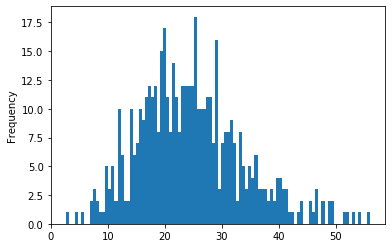

In [22]:
# Plotando um histograma da taxa de distorção

df['Taxa Distorção'].plot.hist(bins=100)

In [31]:
# Quantidade de municipio com taxa menor ou igual a 10

df[df['Taxa Distorção']<= 10].head(20)

,Município,ibge,latitude,longitude,Taxa Distorção
28,Áurea,4301552,-27.6936,-52.0505,5.8
47,Boa Vista do Sul,4302253,-29.3544,-51.6687,9.6
68,Campestre da Serra,4303673,-28.7926,-51.0941,7.6
69,Campina das Missões,4303707,-27.9888,-54.8417,8.8
119,Cotiporã,4305959,-28.9891,-51.6971,7.5
128,Derrubadas,4306320,-27.2642,-53.8645,7.4
133,Dois Lajeados,4306452,-28.9830,-51.8396,9.9
236,Linha Nova,4311643,-29.4679,-51.2003,8.0
268,Nicolau Vergueiro,4312674,-28.5298,-52.4676,7.0
274,Nova Bréscia,4313003,-29.2182,-52.0319,10.0


In [32]:
# Quantidade de municipio com taxa maior ou igual a 50


df[df['Taxa Distorção']>= 45].count()

Município         17
ibge              17
latitude          17
longitude         17
Taxa Distorção    17
dtype: int64

In [34]:
# Como o Folium funciona

# Criar um mapa com base em uma coordenada central
brasil = folium.Map(location=[-13.6987718, -69.7391073], zoom_start=4)

In [36]:
brasil

In [43]:
# Criar um mapa do Rio Grande do Sul

rs = folium.Map(location=[-30.121433,-54.7159878], zoom_start=7)

rs

In [45]:
# Percorrer o Dataframe com base na 'Taxa Distorção <= 10' e desenhar um marcador para cada escola

# Usamos o for e iterrows

for indice, municipio in df[df['Taxa Distorção'] <= 10].iterrows(): 
    folium.Marker(
        location=[municipio['latitude'], municipio['longitude']], 
        popup=municipio['Município'], icon=folium.map.Icon(color='green')).add_to(rs)

    
rs


In [48]:
# Percorrer o Dataframe com base na 'Taxa Distorção >= 45' e desenhar um marcador para cada escola

# Usamos o for e iterrows

for indice, municipio in df[df['Taxa Distorção'] >= 45].iterrows(): 
    folium.Marker(
        location=[municipio['latitude'], municipio['longitude']], 
        popup=municipio['Município'], icon=folium.map.Icon(color='red')).add_to(rs)
    
rs

In [51]:
# Qual a taxa de distorção de uma determinada cidade ( Porto Alegre)

df[df['Município']=='Porto Alegre']['Taxa Distorção']

325    32.3
Name: Taxa Distorção, dtype: float64